In [7]:
%load_ext autoreload
%autoreload 2
import json
import os
import pandas as pd
import numpy as np
from dataset import FFHQDataset
import matplotlib.pyplot as plt

FFHQ_DATA_DIR = 'data/ffhq-features-dataset-master/json'
ATTRIBUTES = ['smile', 'gender', 'age', 'facialHair', 'glasses', 'emotion']

def flatten_dict(dic, pfx=""):
    add_dict = {}
    for k, v in dic.items():
        if isinstance(v, dict):
            add_dict.update(flatten_dict(v, k))
        else:
            k = k if pfx == "" else pfx+"_"+k
            add_dict[k] = v
    return add_dict
file_id = "00001.json"

ffhq_labels = {}
invalid_jsons = []
for i, file_id in enumerate(os.listdir(FFHQ_DATA_DIR)):
    if i == 250:break
    with open(os.path.join(FFHQ_DATA_DIR, file_id), 'r') as f:
        labels = json.load(f)
        if len(labels) == 0: 
            invalid_jsons.append(file_id)
            continue
        labels = labels[0]['faceAttributes']
        labels = {k:labels[k] for k in  ATTRIBUTES}
        labels = flatten_dict(labels)
        ffhq_labels[file_id.split('.')[0]]=labels
    np.save('data/ffhq-features-dataset-master/all_labels.npy', ffhq_labels, allow_pickle=True)
        
df = pd.DataFrame.from_dict(ffhq_labels.values())
print(len(df))
print(len(invalid_jsons), "items ommited")
df.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
249
1 items ommited


,smile,gender,age,facialHair_moustache,facialHair_beard,facialHair_sideburns,glasses,emotion_anger,emotion_contempt,emotion_disgust,emotion_fear,emotion_happiness,emotion_neutral,emotion_sadness,emotion_surprise
0,1.000,male,31.0,0.4,0.4,0.4,NoGlasses,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
1,1.000,female,30.0,0.0,0.0,0.0,NoGlasses,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
2,0.000,female,52.0,0.0,0.0,0.0,NoGlasses,0.001,0.000,0.000,0.000,0.000,0.975,0.023,0.001
3,0.112,female,32.0,0.0,0.0,0.0,NoGlasses,0.680,0.010,0.025,0.014,0.112,0.140,0.010,0.009
4,0.214,male,47.0,0.1,0.4,0.1,ReadingGlasses,0.000,0.005,0.000,0.000,0.214,0.781,0.000,0.000


In [8]:


FFHQ_DATA_DIR = 'data/ffhq_images'
FFHQ_LABELS_DIR = 'data/ffhq-features-dataset-master'
ds = FFHQDataset(FFHQ_DATA_DIR, FFHQ_LABELS_DIR)

create memory efficient dataset from data  data/ffhq_images
all labels loaded.. 
processing  data/ffhq_images/images_resized_20000
processing  data/ffhq_images/images_resized_00000
processing  data/ffhq_images/images_resized_10000
processing  data/ffhq_images/images_resized_05000
	total image cnt:  100


{'smile': 0.876, 'gender': 'male', 'age': 38.0, 'facialHair_moustache': 0.1, 'facialHair_beard': 0.1, 'facialHair_sideburns': 0.1, 'glasses': 'ReadingGlasses', 'emotion_anger': 0.0, 'emotion_contempt': 0.0, 'emotion_disgust': 0.0, 'emotion_fear': 0.0, 'emotion_happiness': 0.876, 'emotion_neutral': 0.123, 'emotion_sadness': 0.0, 'emotion_surprise': 0.0}


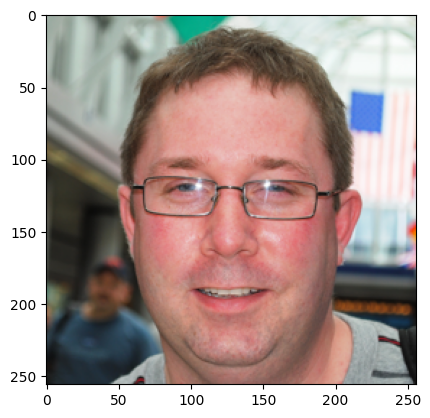

In [11]:
img, label= ds[2]
plt.imshow(img.permute(1, 2, 0))
print(label)